In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans


from sklearn.datasets import make_blobs, load_iris

### Use PCA to improove clusters

In [2]:
# make synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

In [3]:
# use clustering without PCA
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(X)

In [4]:
# Improove clustering with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=4)
y_pred_pca = kmeans_pca.fit_predict(X_pca)

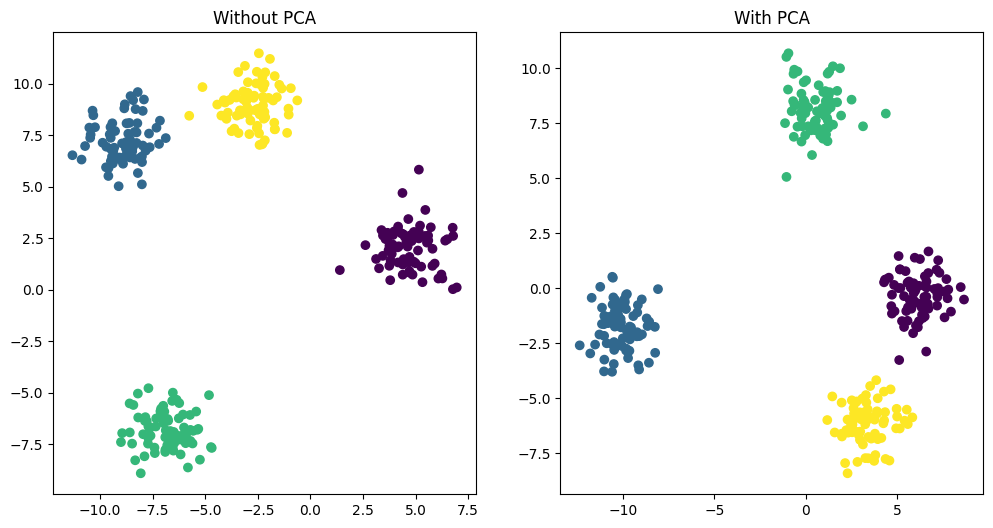

In [5]:
# plot results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('Without PCA')
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca, cmap='viridis')
plt.title('With PCA')
plt.show()

### Data visualisation

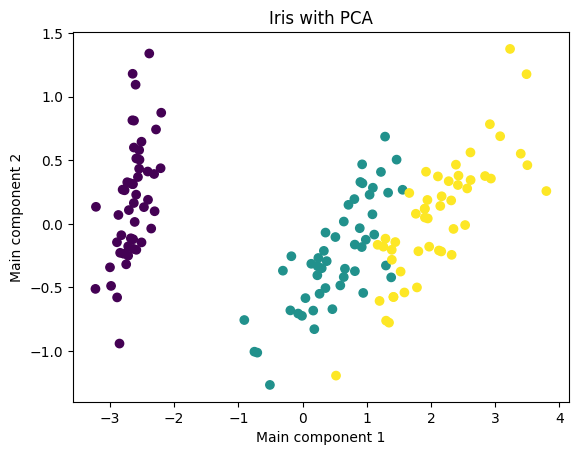

In [6]:
# load iris
data = load_iris()
X, y = data.data, data.target

# reduce data with PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# plot irises
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title("Iris with PCA")
plt.xlabel("Main component 1")
plt.ylabel("Main component 2")
plt.show()

### Estimate PCA quality

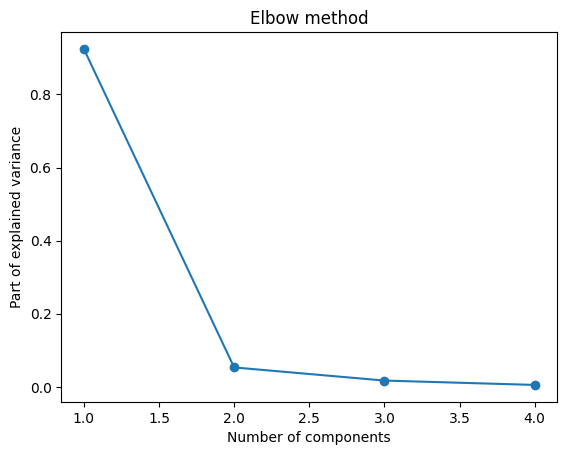

In [7]:
# implement "elbow" method of search of optimal pca components quantity
# create pca
pca = PCA()

# fit
X = data.data
pca.fit(X)

# buld explain variance plots
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Part of explained variance')
plt.title('Elbow method')
plt.show()

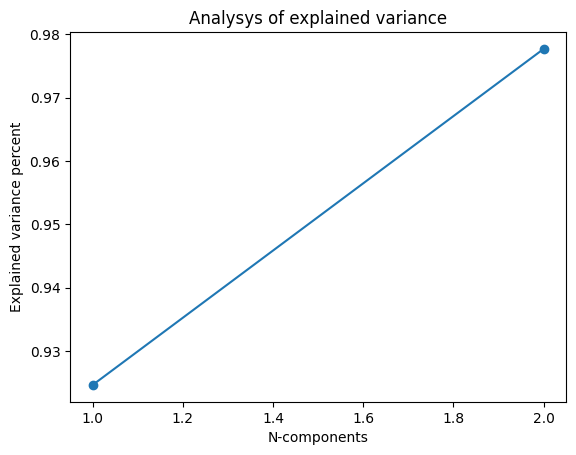

In [8]:
# let's see on method of keeping explained component percents
# create pca with threshold
pca = PCA(0.95) # keep 95% of variance

X = data.data
X_reduced = pca.fit_transform(X)

# make some analysys explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Визуализация объясненной дисперсии
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('N-components')
plt.ylabel('Explained variance percent')
plt.title('Analysys of explained variance')
plt.show()

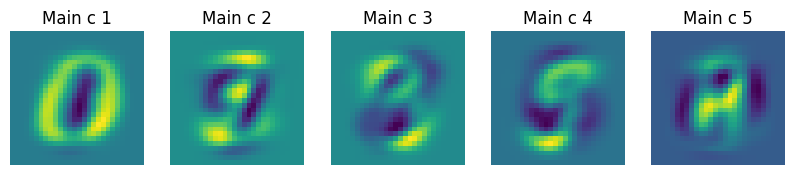

In [10]:
import tensorflow as tf

# load mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# do vectors
X_train = X_train.reshape(-1, 28 * 28)

# PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)

# gain eigen vectors(weights) of main components
eigen_vectors = pca.components_

# plot weights for some first main components
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(eigen_vectors[i].reshape(28, 28), cmap='viridis')
    plt.title(f'Main c {i + 1}')
    plt.axis('off')

plt.show()